Manipulating stacks
===

**Goal:** Demonstrate how to open and manipulate stacks

**Suggested use cases:**

- open and extract specific frames/channels
- manipulate stacks with python (i.e. xarray)
- combine with other software packages like PIL, scikit-image, _etc..._

**Notebook layout:**

1. open a stack with pyimagej
2. extract a channel
3. save the channel
4. re-open the saved file and examine
5. timeseries slicing (slice on the time coordinate)
6. save those files and examine

## Start pyimagej

In [1]:
import imagej
import numpy as np

ij = imagej.init('sc.fiji:fiji')

## Open a stack with pyimagej

In [3]:
img_stack = ij.io().open('example_images/example_stack.tif')
xarr_stack = ij.py.from_java(img_stack) # returns an xarray

[java.lang.Enum.toString] 23:42:28.536 [main] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:70)
	at org.scijava.io.IOService.getOpener(IOService.java:52)
	at org.scijava.io.DefaultIOService.open(Defa

Let's print out the `xarray` we just and check the coordinates.

In [4]:
xarr_stack

<xarray.DataArray (Time: 44, Channel: 4, y: 500, x: 500)>
array([[[[ 242,  216,  262, ...,  233,  241,  299],
         [ 240,  288,  238, ...,  234,  234,  253],
         [ 240,  259,  260, ...,  273,  255,  251],
         ...,
         [ 333,  288,  281, ...,  267,  249,  279],
         [ 323,  288,  284, ...,  228,  237,  279],
         [ 289,  254,  262, ...,  244,  242,  242]],

        [[ 463,  516,  449, ...,  471,  504,  487],
         [ 510,  520,  516, ...,  506,  434,  502],
         [ 507,  494,  508, ...,  474,  496,  495],
         ...,
         [ 543,  474,  524, ...,  450,  466,  515],
         [ 566,  478,  495, ...,  437,  465,  542],
         [ 562,  553,  566, ...,  524,  513,  514]],

        [[1082, 1047, 1163, ...,  971, 1005, 1023],
         [1134, 1148, 1015, ..., 1008, 1113, 1130],
         [1085, 1142, 1157, ..., 1043, 1050,  970],
         ...,
...
         ...,
         [ 415,  413,  395, ...,  418,  361,  371],
         [ 369,  398,  422, ...,  381,  392,  395],
         [ 419,  357,  386, ...,  375,  355,  395]],

        [[1602, 1694, 1620, ..., 1221, 1206, 1170],
         [1597, 1529, 1519, ..., 1295, 1158, 1243],
         [1449, 1596, 1540, ..., 1189, 1220, 1205],
         ...,
         [1603, 1540, 1495, ..., 1328, 1234, 1249],
         [1561, 1500, 1549, ..., 1300, 1282, 1276],
         [1460, 1447, 1422, ..., 1253, 1428, 1299]],

        [[ 286,  315,  288, ...,  174,  172,  179],
         [ 286,  277,  255, ...,  172,  168,  186],
         [ 297,  314,  231, ...,  173,  191,  185],
         ...,
         [ 184,  175,  184, ...,  166,  194,  181],
         [ 205,  199,  198, ...,  188,  198,  170],
         [ 185,  176,  176, ...,  205,  204,  192]]]], dtype=uint16)
Coordinates:
  * x        (x) float64 0.0 0.325 0.65 0.975 1.3 ... 161.2 161.5 161.9 162.2
  * y        (y) float64 0.0 0.325 0.65 0.975 1.3 ... 161.2 161.5 161.9 162.2
  * Channel  (Channel) float64 0.0 1.0 2.0 3.0
  * Time     (Time) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 39.0 40.0 41.0 42.0 43.0
Attributes:
    rois:                    None
    tables:                  None
    scifio.metadata.global:  io.scif.filters.PlaneSeparatorMetadata@3dc82e6a
    scifio.metadata.image:   io.scif.FieldPrinter@46d1b59\n\t--class io.scif....

Here we get some crucial information about our data. This data has 4 channels -- lets extract a specific slice and view it.

In this example our `xarray` has the folloing coordinate order: `time`, `channel`, `y`, `x`. Now we can view frame 20, channel 3 (_e.g._ `[20,2,:,:]`.

## Extract a single slice from the stack

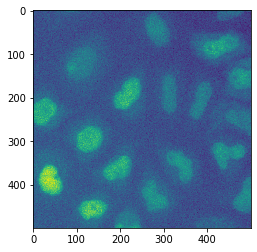

In [5]:
img_slice = xarr_stack[20,2,:,:] #time:channel:y:x
ij.py.show(img_slice)

In [6]:
ij_slice = ij.py.to_java(img_slice) # convert our python object into java before saving
ij.io().save(ij_slice, 'ij_slice.tif')

## Extract a single channel

In [7]:
stack_ch3 = xarr_stack[:,2,:,:]
stack_ch3.coords # check the coordinates

Coordinates:
  * x        (x) float64 0.0 0.325 0.65 0.975 1.3 ... 161.2 161.5 161.9 162.2
  * y        (y) float64 0.0 0.325 0.65 0.975 1.3 ... 161.2 161.5 161.9 162.2
    Channel  float64 2.0
  * Time     (Time) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 39.0 40.0 41.0 42.0 43.0

In [8]:
ij_stack_ch3 = ij.py.to_java(stack_ch3)
ij.io().save(ij_stack_ch3, 'ij_stack_ch3.tif')

## Use an imagej stack with other woftware packeages (_e.g. PIL_)

WIP
open image in with imagej > convert to xarray > work with PIL / scikit-image

In [9]:
from PIL import Image, ImageFilter
from IPython.display import display # to display image

im = Image.fromarray(img_slice.data*255)

In [10]:
# TODO apply a filter to the image

In [11]:
# TODO: for loop with stack image (e.g. something akin to batch processing)
# to expose pythonic ways to interact with stack data